In [1]:
import numpy as np
from scipy.linalg import expm, kron
from itertools import combinations, product
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
from QMultiAdapt.solver import solve_avq_vect
from QMultiAdapt.effh import VectorizedEffectiveHamiltonian
from QMultiAdapt.ansatzVect import Ansatz
import matplotlib.pyplot as plt

In [2]:
# Execution Code for Amplitude damping channel example
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sp = (sx + 1j * sy) / 2
Id = np.eye(2, dtype=np.complex128)

tf = 1000e-12
dt = 1000e-14
gamma = 1.52e9
H = np.eye(2, dtype=np.complex128)
lind = sp
H = VectorizedEffectiveHamiltonian(H, gamma, lind)
u0 = np.array([1 / 2, np.sqrt(3) / 2], dtype=np.complex128) #it should be normalized initial state with 2^n length

# u0 = np.array([0, 1], dtype=np.complex128)
ansatz = Ansatz(u0, relrcut=1e-6)
res = solve_avq_vect(H, ansatz, [0, tf], dt)


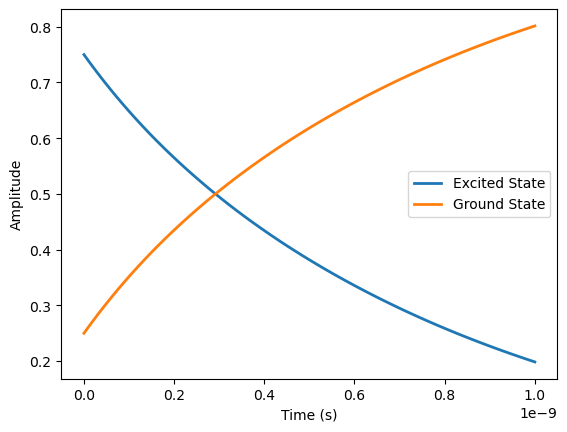

In [3]:

excited = [res.u[i][1, 1].real for i in range(100)]
ground = [res.u[i][0, 0].real for i in range(100)]
times = np.linspace(0, 1000e-12, 100)

plt.plot(times, excited, label="Excited State", linewidth=2)
plt.plot(times, ground, label="Ground State", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
